In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
import torch

In [ ]:
import numpy as np

timestep = 10 # 시점의 수 -> NLP 분야에서는 보통 문장의 길이! (구성하는 단어의 수)
input_size = 4 # 입력의 차원 -> 단어 벡터 디멘젼(차원)
hidden_size = 8 # 은닉 상태의 크기 -> 메모리 셀의 용량

inputs = np.random.random((timestep, input_size)) # 입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size)) # 초기 은닉 상태는 0(벡터)로 초기화
# 은닉 상태의 크기 hidden_size로 은닉 상태 만듬.

In [ ]:
Wx = np.random.random((hidden_size, input_size)) # (8, 4) 크기의 2D 텐서 생성, 입력에 대한 가중치
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8) 크기의 2D 텐서 생성, 은닉 상태에 대한 가중치
b = np.random.random((hidden_size)) # (8,) 크기의 1D 텐서 생성, 이 값은 편향(bias)

In [ ]:
print(np.shape(Wx)) # 은닉 상태의 크기 * 입력의 차원
print(np.shape(Wh)) # 은닉 상태의 크기 * 은낙 상태의 크기
print(np.shape(b)) # 은닉 상태의 크기

In [ ]:
total_hidden_states = []

# Memory cell의 동작 과정

for input_t in inputs: # 각 시점에 따른 입력값
     # tanh(W_x * x_t + W_h * h_{t-1} + b)
     oputput_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t) + b)

     total_hidden_states.append(list(oputput_t)) # 각 시점의 은닉 상태 값을 계속해서 추적

     hidden_state_t = oputput_t # 은닉층에서의 계산 값을 다음 시점으로 전달

total_hidden_states = np.stack(total_hidden_states, axis=0) # 가로로 쌓이는 것은 분석이 힘들기 때문에 세로로 쌓기 위함

print(total_hidden_states)

In [ ]:
import torch
import torch.nn as nn

In [ ]:
input_size = 5 # 입력의 크기
hidden_size = 8 # 은닉 상태의 크기

In [ ]:
# (batch_size, time_steps, input_size)

inputs = torch.Tensor(1, 10, 5)

In [ ]:
cell = nn.RNN(input_size, hidden_size, batch_first=True)

In [ ]:
outputs, _status = cell(inputs)

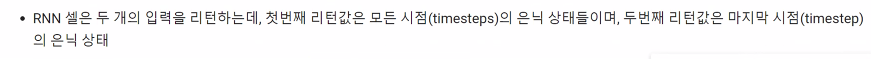

In [ ]:
print(outputs.shape) # 모든 time-step의 hidden_state

In [ ]:
print(_status.shape)